In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

  Using cached rustworkx-0.17.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (10 kB)
  Using cached stevedore-5.5.0-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 2.1 MB/s eta 0:00:0000:0100:010m
Using cached rustworkx-0.17.1-cp39-abi3-macosx_11_0_arm64.whl (2.0 MB)
Using cached stevedore-5.5.0-py3-none-any.whl (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.6 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 968.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=e78f11774bd79dc0a265fa455100cf7c07184070fa04ba0a37d4859779a3dc16
  Stored in directory: /Users/balajig/Library/Caches/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


=== Task 1: Apply Hadamard on both qubits ===
Measurement counts: {'10': 257, '00': 262, '11': 274, '01': 231}


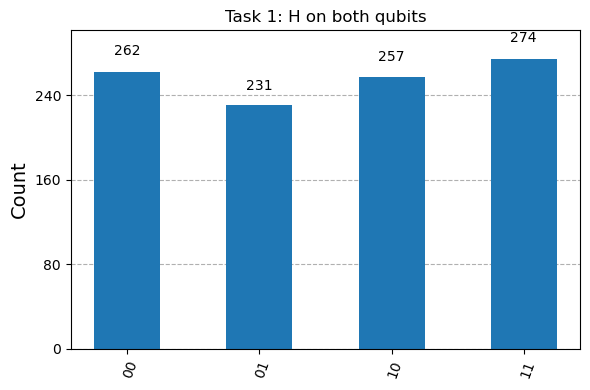

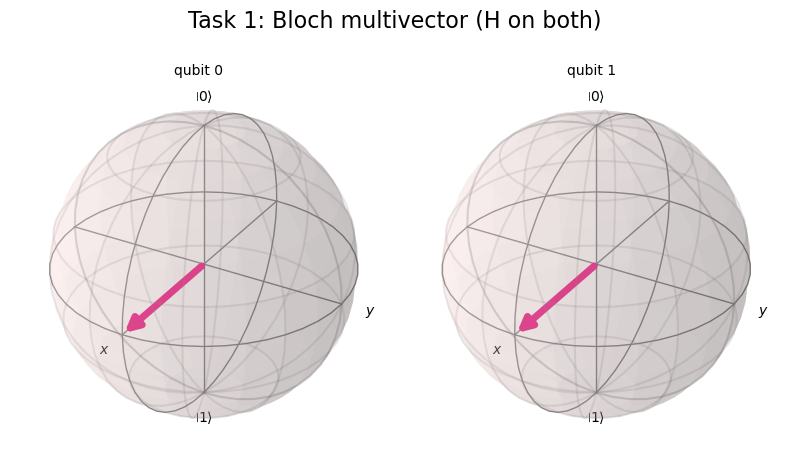


=== Task 2: Swap X gate to second qubit ===
Measurement counts: {'10': 1024}


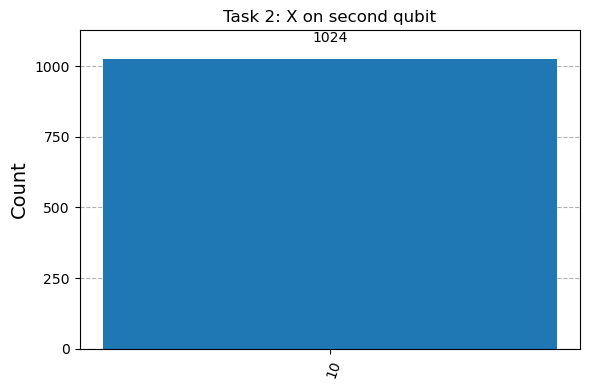


=== Task 3: Add a CNOT gate (entanglement) ===
Measurement counts (Bell state): {'11': 511, '00': 513}


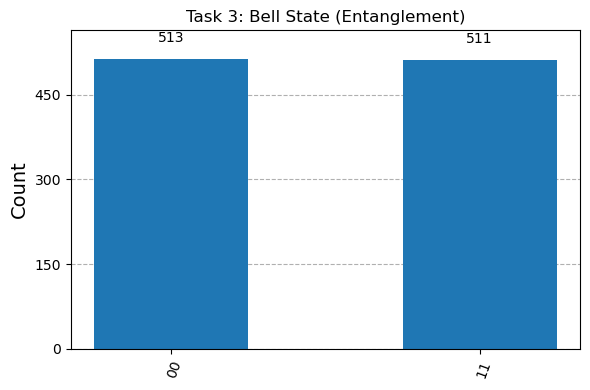

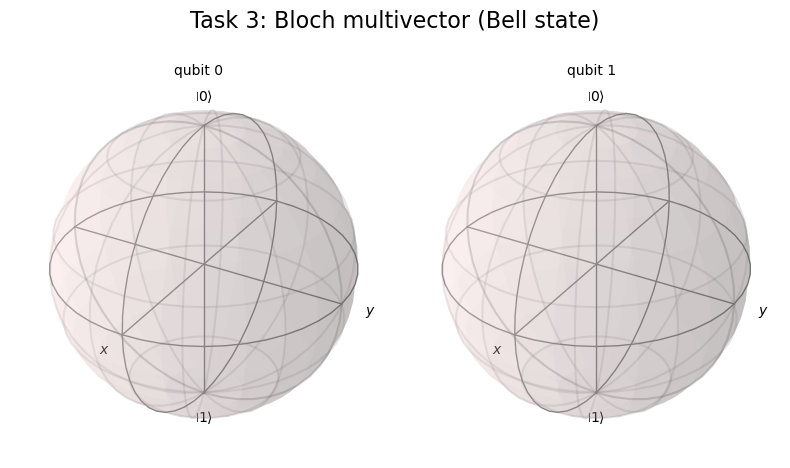


=== Task 4: Increase shots from 1024 to 4096 ===
Counts (1024 shots): {'11': 515, '00': 509}
Counts (4096 shots): {'00': 1998, '11': 2098}


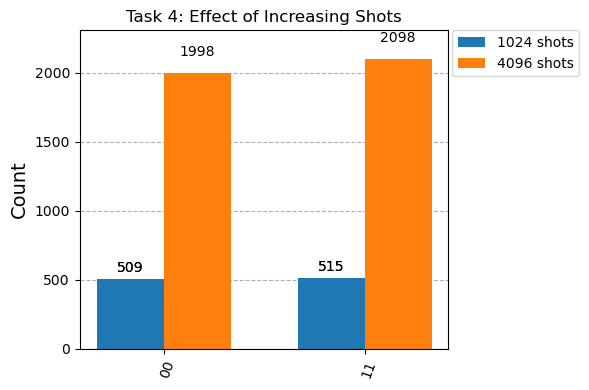


=== Task 5: Bloch sphere visualization ===


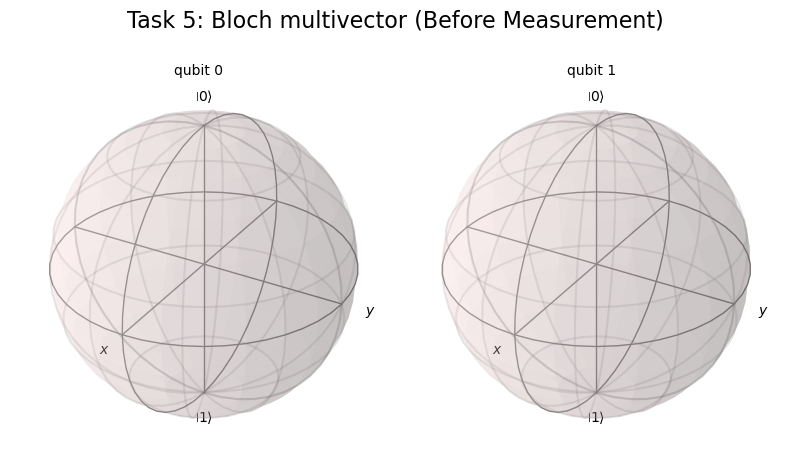

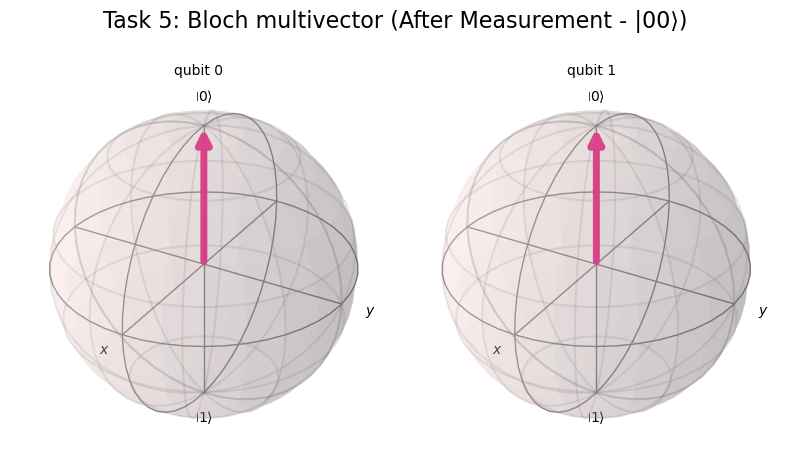

In [2]:


!pip install qiskit qiskit-aer pylatexenc --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
plt.rcParams["figure.figsize"] = (6, 4)

sim = AerSimulator()

# ---------- Task 1 ----------
print("=== Task 1: Apply Hadamard on both qubits ===")
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)
qc1.measure([0, 1], [0, 1])
result1 = sim.run(transpile(qc1, sim), shots=1024).result()
counts1 = result1.get_counts()
print("Measurement counts:", counts1)

fig1 = plot_histogram(counts1, title="Task 1: H on both qubits")
display(fig1)

qc_temp = QuantumCircuit(2)
qc_temp.h(0)
qc_temp.h(1)
sv1 = Statevector.from_instruction(qc_temp)
fig2 = plot_bloch_multivector(sv1, title="Task 1: Bloch multivector (H on both)")
display(fig2)

# ---------- Task 2 ----------
print("\n=== Task 2: Swap X gate to second qubit ===")
qc2 = QuantumCircuit(2, 2)
qc2.x(1)
qc2.measure([0, 1], [0, 1])
counts2 = sim.run(transpile(qc2, sim), shots=1024).result().get_counts()
print("Measurement counts:", counts2)

fig3 = plot_histogram(counts2, title="Task 2: X on second qubit")
display(fig3)

# ---------- Task 3 ----------
print("\n=== Task 3: Add a CNOT gate (entanglement) ===")
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.cx(0, 1)
qc3.measure([0, 1], [0, 1])
counts3 = sim.run(transpile(qc3, sim), shots=1024).result().get_counts()
print("Measurement counts (Bell state):", counts3)

fig4 = plot_histogram(counts3, title="Task 3: Bell State (Entanglement)")
display(fig4)

sv3 = QuantumCircuit(2)
sv3.h(0)
sv3.cx(0, 1)
state3 = Statevector.from_instruction(sv3)
fig5 = plot_bloch_multivector(state3, title="Task 3: Bloch multivector (Bell state)")
display(fig5)

# ---------- Task 4 ----------
print("\n=== Task 4: Increase shots from 1024 to 4096 ===")
result4_1024 = sim.run(transpile(qc3, sim), shots=1024).result()
result4_4096 = sim.run(transpile(qc3, sim), shots=4096).result()
counts_1024 = result4_1024.get_counts()
counts_4096 = result4_4096.get_counts()
print("Counts (1024 shots):", counts_1024)
print("Counts (4096 shots):", counts_4096)

fig6 = plot_histogram(
    [counts_1024, counts_4096],
    legend=["1024 shots", "4096 shots"],
    title="Task 4: Effect of Increasing Shots"
)
display(fig6)

# ---------- Task 5 ----------
print("\n=== Task 5: Bloch sphere visualization ===")
qc5 = QuantumCircuit(2)
qc5.h(0)
qc5.cx(0, 1)
state5 = Statevector.from_instruction(qc5)
fig7 = plot_bloch_multivector(state5, title="Task 5: Bloch multivector (Before Measurement)")
display(fig7)

post_state = Statevector.from_label('00')
fig8 = plot_bloch_multivector(post_state, title="Task 5: Bloch multivector (After Measurement - |00⟩)")
display(fig8)
